In [1]:
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 2.0.1+cu118
CUDA 是否可用 True


In [2]:
%pip install mmcv==2.0.0 -f https://download.openmmlab.com/mmcv/dist/cu118/torch2.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0


In [3]:
!pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning 'mmdet>=3.0.0rc1' -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 22.3 MB/s eta 0:00:00


In [4]:
!git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15117, done.
remote: Counting objects: 100% (684/684), done.
remote: Compressing objects: 100% (455/455), done.
remote: Total 15117 (delta 272), reused 433 (delta 197), pack-reused 14433
Receiving objects: 100% (15117/15117), 20.27 MiB | 8.59 MiB/s, done.
Resolving deltas: 100% (10581/10581), done.


In [5]:
import os
os.chdir('mmsegmentation')

In [6]:
!pip install -v -e .

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-16z1m8mz/mmsegmentation.egg-info
  writing /tmp/pip-pip-egg-info-16z1m8mz/mmsegmentation.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-16z1m8mz/mmsegmentation.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-16z1m8mz/mmsegmentation.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-16z1m8mz/mmsegmentation.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-16z1m8mz/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-16z1m8mz/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  writing manifest f

In [ ]:
os.mkdir('checkpoint')
os.mkdir('outputs')
os.mkdir('data')

In [7]:
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.8
编译器版本 GCC 9.3


In [8]:
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.0.0


In [9]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [10]:
!pwd

/content/mmsegmentation


In [11]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip

!unzip Watermelon87_Semantic_Seg_Mask.zip >> /dev/null # 解压

!rm -rf Watermelon87_Semantic_Seg_Mask.zip # 删除压缩包

--2023-06-13 13:21:16--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13230222 (13M) [application/zip]
Saving to: ‘Watermelon87_Semantic_Seg_Mask.zip’

Watermelon87_Semant 100%[===================>]  12.62M  16.1MB/s    in 0.8s    

2023-06-13 13:21:17 (16.1 MB/s) - ‘Watermelon87_Semantic_Seg_Mask.zip’ saved [13230222/13230222]



- **数据集这里有个小坑，注意修改下ann_dir中两张图片的名称与img_dir中对应**

In [12]:
### 可视化单张图像
# 指定单张图像路径
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
img_path = 'Watermelon87_Semantic_Seg_Mask/img_dir/train/test.jpg'
mask_path = 'Watermelon87_Semantic_Seg_Mask/ann_dir/train/test.png'

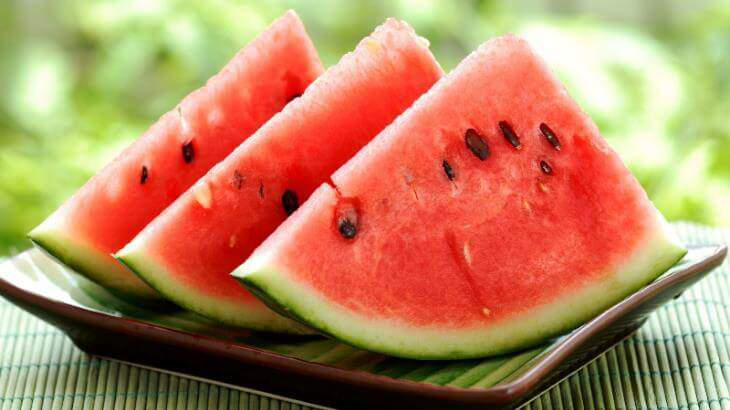

In [13]:
Image.open(img_path)

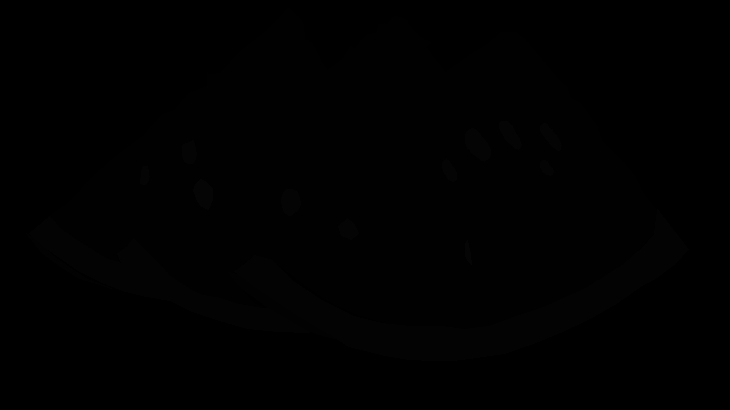

In [14]:
Image.open(mask_path)

| 类别名称 | 类别语义	| 标注类别 | 灰度图像素值 |
| -------- | -------- | -------- | ------------ |
|   /  |  背景  |	 / 	 |   0   |
|  red	| 西瓜红瓤	|多段线（polygon）|	1|
| green|	西瓜外壳	|多段线（polygon）|	2|
|white	|西瓜白皮|	多段线（polygon）	|3|
|seed-black|	西瓜黑籽|	多段线（polygon）|	4|
|seed-black|	西瓜白籽	|多段线（polygon）|	5|

In [17]:
!rm -rf mmseg/datasets/DubaiDataset.py # 删除原有文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset.py -P mmseg/datasets
!rm -rf mmseg/datasets/__init__.py # 删除原有文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/__init__.py -P mmseg/datasets
!rm -rf configs/_base_/datasets/DubaiDataset_pipeline.py
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset_pipeline.py -P configs/_base_/datasets


--2023-06-13 13:31:56--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867 [binary/octet-stream]
Saving to: ‘mmseg/datasets/DubaiDataset.py’

DubaiDataset.py     100%[===================>]     867  --.-KB/s    in 0.001s  

2023-06-13 13:31:57 (1.40 MB/s) - ‘mmseg/datasets/DubaiDataset.py’ saved [867/867]

--2023-06-13 13:31:57--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/__init__.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.

In [ ]:
from mmengine import Config
cfg = Config.fromfile('./configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py')

In [ ]:
cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head

# 模型 decode/auxiliary 输出头，指定为类别个数
cfg.model.decode_head.num_classes = 6
cfg.model.auxiliary_head.num_classes = 6

cfg.train_dataloader.batch_size = 8


# 结果保存目录
cfg.work_dir = './work_dirs/WatermelonDataset'

# 训练迭代次数
cfg.train_cfg.max_iters = 2000
# 评估模型间隔
cfg.train_cfg.val_interval = 400
# 日志记录间隔
cfg.default_hooks.logger.interval = 100
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 1000

## 在子豪兄配置文件基础上修改一些数据集路径
cfg.dataset_type = 'WatermelonDataset'
cfg.data_root = 'Watermelon87_Semantic_Seg_Mask/'
cfg.train_dataloader.dataset.type='WatermelonDataset'
cfg.train_dataloader.dataset.data_root='Watermelon87_Semantic_Seg_Masks/'
cfg.val_dataloader.dataset.type='WatermelonDataset'
cfg.val_dataloader.dataset.data_root='Watermelon87_Semantic_Seg_Masks/'
cfg.test_dataloader = cfg.val_dataloader

# 随机数种子
cfg['randomness'] = dict(seed=0)

In [ ]:
print(cfg.pretty_text)

norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(64, 64))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(256, 256)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=51

In [ ]:
cfg.dump('pspnet-WatermelonDataset_20230613.py')

## 开始训练

In [5]:
import numpy as np

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine
from mmengine import Config
cfg = Config.fromfile('pspnet-WatermelonDataset_20230613.py')

from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

runner.train()

06/13 13:47:00 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ig

06/13 13:47:02 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/13 13:47:02 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


06/13 13:47:03 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/13 13:47:04 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/13 13:47:04 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
06/13 13:47:04 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

06/13 13:47:04 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/13 13:47:04 - mmengine - INFO - Checkpoints will be saved to /content/mmsegmentation/work_dirs/WatermelonDataset.
06/13 13:47:07 - mmengine - INFO - Exp name: pspnet-WatermelonDataset_20230613_20230613_134700
06/13 13:47:07 - mmengine - INFO - Iter(train) [   6/2000]  lr: 9.9989e-03  eta: 0:19:57  time: 0.6005  data_time: 0.0220  memory: 3978  loss: 0.1478  decode.loss_ce: 0.1035  decode.acc_seg:

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/13 13:51:53 - mmengine - INFO - per class results:
06/13 13:51:53 - mmengine - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
|     /      | 64.32 | 99.28 |
|    red     | 26.08 | 26.42 |
| seed-black |  3.26 |  3.31 |
|   green    | 16.81 | 16.87 |
| seed-white | 28.53 | 43.05 |
|   white    |  0.0  |  0.0  |
+------------+-------+-------+
06/13 13:51:53 - mmengine - INFO - Iter(val) [11/11]    aAcc: 67.1900  mIoU: 23.1700  mAcc: 31.4900  data_time: 0.0303  time: 5.2273
06/13 13:51:56 - mmengine - INFO - The best checkpoint with 67.1900 aAcc at 400 iter is saved to best_aAcc_iter_400.pth.
06/13 13:52:54 - mmengine - INFO - Iter(train) [ 500/2000]  lr: 9.8888e-03  eta: 0:14:37  time: 0.5720  data_time: 0.0124  memory: 10444  loss: 0.0504  decode.loss_ce: 0.0356  decode.acc_seg: 76.2512  aux.loss_ce: 0.0148  aux.acc_seg: 78.3203
06/13 13:53:52 - mmengine - INFO - Iter(train) [ 600/2000]  lr: 9.8665e-03  eta: 0:13:37  time: 0.5759 

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

In [3]:

import os
os.chdir("/content/mmsegmentation")
# os.chdir("/content/mmsegmentation/work_dirs")
!rm -rf work_dirs
!pwd

/content/mmsegmentation


- **测试集性能评估指标**

In [6]:
!python tools/test.py pspnet-WatermelonDataset_20230613.py work_dirs/WatermelonDataset/best_aAcc_iter_1600.pth

06/13 14:13:41 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

- **用模型预测网图**

Loads checkpoint by local backend from path: ./work_dirs/WatermelonDataset/best_aAcc_iter_1600.pth


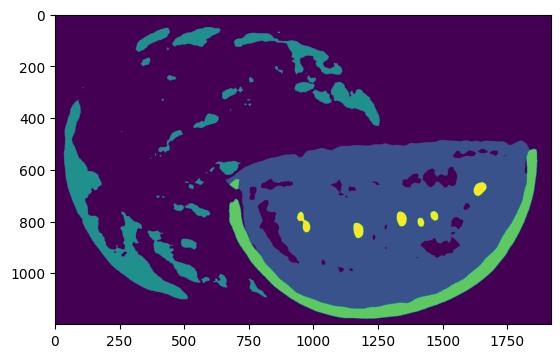

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mmseg.apis import init_model, inference_model, show_result_pyplot
checkpoint_path = './work_dirs/WatermelonDataset/best_aAcc_iter_1600.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')
img = mmcv.imread('test.png')
result = inference_model(model, img)
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
plt.imshow(pred_mask)
plt.show()

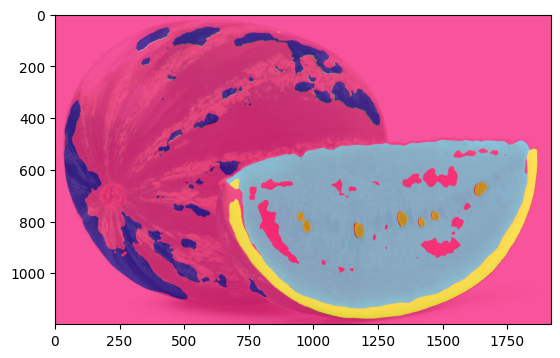

In [11]:
# 可视化预测结果
visualization = show_result_pyplot(model, img, result, opacity=0.8, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()